In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AF_online_sales_dataset.csv to AF_online_sales_dataset.csv


In [ ]:
import pandas as pd

#Membaca data
df = pd.read_csv('AF_online_sales_dataset.csv')
df.head()

,tmstmp,product_category,product_subcategory,product,brand_name,product_price,quantity_sold,total_amount,total_costs,payment_type,...,customer_address,address_details,customer_city,customer_state,store_website,employee_firstname,employee_lastname,employee_email,employee_skill,employee_education
0,2023-02-02 14:41:12,Protection,Padding,All Star KP2500 Small Adult Knee Pad (Pairs),All Star,18.69,5,93.45,23.85,credit card,...,810 Elgar Terrace,PO Box 62435,Charlotte,NC,helmetheroshop.com,Orelee,Curmi,povill5o@admin.ch,Rubber,Kardan University
1,2024-01-09 00:58:17,Footwear,Socks,Multi-Sport Sock,Champro,10.63,1,7.97,3.85,PayPal,...,022 Cardinal Point,PO Box 88829,Detroit,MI,pigskinprovisions.com,Zeb,Absalom,crolingson3b@berkeley.edu,Live Events,National Taras Shevchenko University of Kiev
2,2022-03-16 09:27:34,Gloves,Adult,Cutters S150 Game Day Receiver Adult,Cutters,64.67,7,452.69,494.34,bank wire,...,80284 Warrior Terrace,Apt 362,Long Beach,CA,huddlehaven.com,Giffer,Euesden,pgiggy@boston.com,Security Clearance,Tohwa University
3,2023-10-30 23:03:56,Helmets,Face Masks,Riddell G2BDC (R74910),Riddell,46.55,1,46.55,19.94,credit card,...,26 Sloan Avenue,16th Floor,Newton,MA,huddlehaven.com,Manya,Hilland,tisacq3c@shinystat.com,Print On Demand,Katholieke Hogeschool Limburg
4,2023-02-28 13:00:21,Helmets,Helmet Components,Riddell Speedflex Front Pad (R92400),Riddell,34.25,4,109.60,79.20,gift card,...,51 Walton Drive,Suite 22,New York City,NY,spikestrategies.com,Giusto,Sporrij,hpoulsum2g@kickstarter.com,BST,European University at St.Petersburg


In [ ]:
print(df.dtypes)

tmstmp                  object
product_category        object
product_subcategory     object
product                 object
brand_name              object
product_price          float64
quantity_sold            int64
total_amount           float64
total_costs            float64
payment_type            object
shipping_method         object
coupon_discount          int64
customer_firstname      object
customer_lastname       object
customer_gender         object
customer_age             int64
customer_shirtsize      object
customer_email          object
customer_phone           int64
customer_address        object
address_details         object
customer_city           object
customer_state          object
store_website           object
employee_firstname      object
employee_lastname       object
employee_email          object
employee_skill          object
employee_education      object
dtype: object


In [ ]:
#Mengubah Nama Kolom
df = df.rename(columns={
    'total_amount': 'Revenue',
    'quantity_sold': 'Quantity',
    'product_price': 'Product Price'})

#Mengubah ke tipe numeric
numeric_kol = ['Revenue', 'Quantity', 'Product Price']
df[numeric_kol] = df[numeric_kol].apply(pd.to_numeric, errors='coerce')

In [ ]:
print(df.columns)

Index(['tmstmp', 'product_category', 'product_subcategory', 'product',
       'brand_name', 'Product Price', 'Quantity', 'Revenue', 'total_costs',
       'payment_type', 'shipping_method', 'coupon_discount',
       'customer_firstname', 'customer_lastname', 'customer_gender',
       'customer_age', 'customer_shirtsize', 'customer_email',
       'customer_phone', 'customer_address', 'address_details',
       'customer_city', 'customer_state', 'store_website',
       'employee_firstname', 'employee_lastname', 'employee_email',
       'employee_skill', 'employee_education'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_simple = df[['Quantity']]
y_simple = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred_simple = model_simple.predict(X_test)

print("REGRESI LINEAR SEDERHANA")
print(f"Intercept: {model_simple.intercept_}")
print(f"Koefisien: {model_simple.coef_[0]}")
print(f"Nilai R-squared: {r2_score(y_test, y_pred_simple):.4f}")
print(f"Nilai MSE: {mean_squared_error(y_test, y_pred_simple):.4f}")

REGRESI LINEAR SEDERHANA
Intercept: 1.2429556816827585
Koefisien: 73.19159871443681
Nilai R-squared: 0.1009
Nilai MSE: 394737.3891


In [ ]:
X_mult = df[['Quantity', 'Product Price']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X_mult, y, test_size=0.2, random_state=42)

model_mult = LinearRegression()
model_mult.fit(X_train, y_train)

y_pred_mult = model_mult.predict(X_test)

print("REGRESI LINEAR MULTIPLE")
print(f"Intercept: {model_mult.intercept_}")
print(f"Koefisien: {model_mult.coef_}")
print(f"Nilai R-squared: {r2_score(y_test, y_pred_mult):.4f}")
print(f"Nilai MSE: {mean_squared_error(y_test, y_pred_mult):.4f}")

REGRESI LINEAR MULTIPLE
Intercept: -403.89590188574556
Koefisien: [73.6118102  5.2053756]
Nilai R-squared: 0.8039
Nilai MSE: 86106.2780


In [ ]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)

def classify_revenue(val):
  if val < Q1:
    return 'Rendah'
  elif val <= Q3:
      return 'Sedang'
  else:
      return 'Tinggi'

df['Revenue_Class'] = df['Revenue'].apply(classify_revenue)

print("\n=== DISTRIBUSI KELAS REVENUE ===")
print(df['Revenue_Class'].value_counts())


=== DISTRIBUSI KELAS REVENUE ===
Revenue_Class
Sedang    266502
Rendah    133250
Tinggi    133248
Name: count, dtype: int64


In [ ]:
import pandas as pd

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Quantity', 'Product Price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


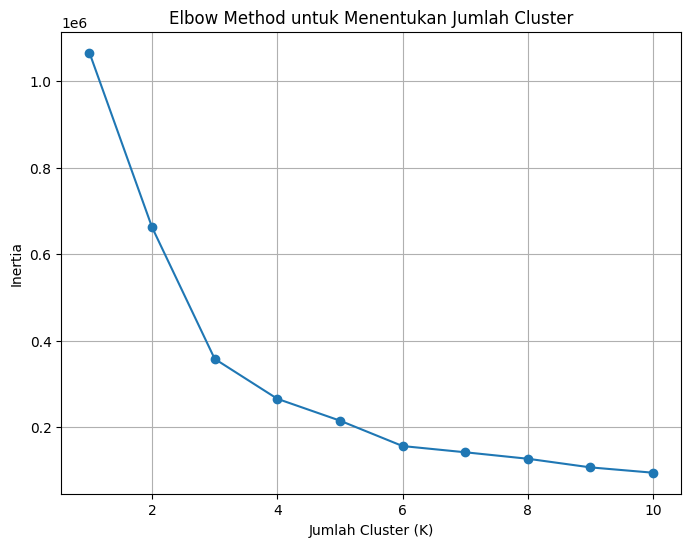

In [ ]:
inersia = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inersia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inersia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [31]:
df.head()

,tmstmp,product_category,product_subcategory,product,brand_name,Product Price,Quantity,Revenue,total_costs,payment_type,...,address_details,customer_city,customer_state,store_website,employee_firstname,employee_lastname,employee_email,employee_skill,employee_education,Revenue_Class
0,2023-02-02 14:41:12,Protection,Padding,All Star KP2500 Small Adult Knee Pad (Pairs),All Star,18.69,5,93.45,23.85,credit card,...,PO Box 62435,Charlotte,NC,helmetheroshop.com,Orelee,Curmi,povill5o@admin.ch,Rubber,Kardan University,Sedang
1,2024-01-09 00:58:17,Footwear,Socks,Multi-Sport Sock,Champro,10.63,1,7.97,3.85,PayPal,...,PO Box 88829,Detroit,MI,pigskinprovisions.com,Zeb,Absalom,crolingson3b@berkeley.edu,Live Events,National Taras Shevchenko University of Kiev,Rendah
2,2022-03-16 09:27:34,Gloves,Adult,Cutters S150 Game Day Receiver Adult,Cutters,64.67,7,452.69,494.34,bank wire,...,Apt 362,Long Beach,CA,huddlehaven.com,Giffer,Euesden,pgiggy@boston.com,Security Clearance,Tohwa University,Tinggi
3,2023-10-30 23:03:56,Helmets,Face Masks,Riddell G2BDC (R74910),Riddell,46.55,1,46.55,19.94,credit card,...,16th Floor,Newton,MA,huddlehaven.com,Manya,Hilland,tisacq3c@shinystat.com,Print On Demand,Katholieke Hogeschool Limburg,Rendah
4,2023-02-28 13:00:21,Helmets,Helmet Components,Riddell Speedflex Front Pad (R92400),Riddell,34.25,4,109.60,79.20,gift card,...,Suite 22,New York City,NY,spikestrategies.com,Giusto,Sporrij,hpoulsum2g@kickstarter.com,BST,European University at St.Petersburg,Sedang


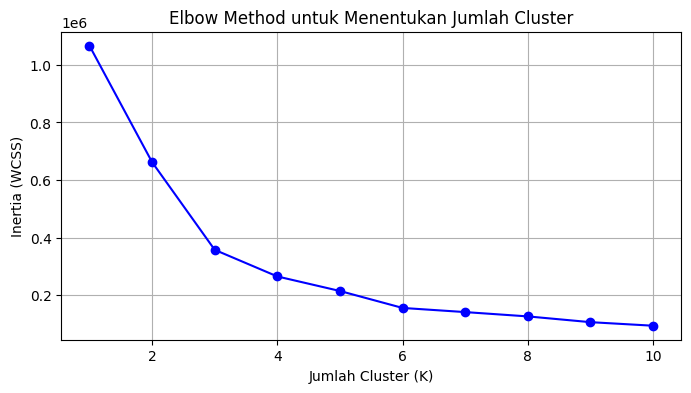

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Buat list untuk menyimpan nilai inertia (WCSS)
inertia_scores = []

# Coba jumlah cluster dari 1 sampai 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled = data yang sudah dinormalisasi/standarisasi
    inertia_scores.append(kmeans.inertia_)  # WCSS

# Plot elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_scores, marker='o', color='blue')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


In [33]:
print(X_scaled.shape)

(533000, 2)


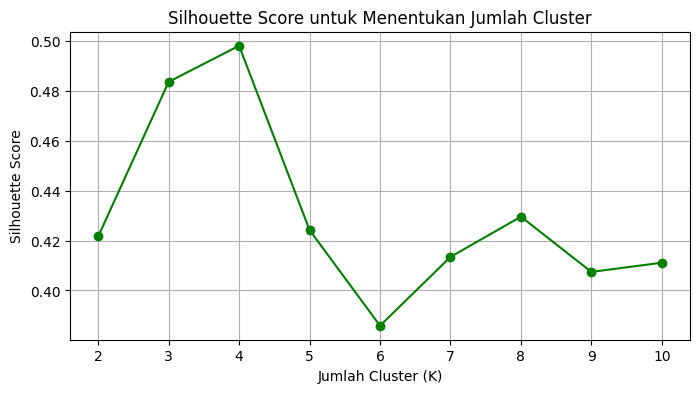

In [35]:
import numpy as np

# Ambil 2000 sample acak dari X_scaled
idx = np.random.choice(X_scaled.shape[0], size=2000, replace=False)
X_sample = X_scaled[idx]

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample)  # gunakan X_sample yang lebih kecil
    score = silhouette_score(X_sample, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Revenue_Label'] = le.fit_transform(df['Revenue_Class'])

x = df[['Quantity', 'Product Price']]
y = df['Revenue_Label']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [41]:
# Ambil 2000 sampel
x_sample, _, y_sample, _ = train_test_split(x, y, train_size=2000, stratify=y, random_state=42)

param_grid = {'knn__n_neighbors': list(range(1, 21))}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_sample, y_sample)

print("Nilai k Terbaik:", grid.best_params_['knn__n_neighbors'])
print("Skor Akurasi Tertinggi:", grid.best_score_)


Nilai k Terbaik: 1
Skor Akurasi Tertinggi: 0.958


In [42]:
terbaik_model = grid.best_estimator_

cv_scores = cross_val_score(terbaik_model, x, y, scoring='accuracy')
print("Skor Cross-Validation:", cv_scores)
print("Rata-rata Skor Akurasi: ", cv_scores.mean())

Skor Cross-Validation: [0.9606848  0.95966229 0.96089118 0.96060976 0.96036585]
Rata-rata Skor Akurasi:  0.9604427767354595
